# Análise de Dados Aplicada a Recursos Humanos

Uma empresa de consultoria busca Cientistas de Dados com qualificações em treinamentos ministrados pela própria empresa. O objetivo da empresa é identificar candidatos com perfil adequado e realmente interessados em trabalhar para ela ao concluírem os treinamentos. O objetivo da análise é realizar um extenso trabalho de análise nos dados, compreender como estão organizados, realizar limpeza e transformação dos dados conforme necessário, detectar eventuais padrões e diagnósticos e ao final emitir um parecer com um resumo sobre os dados.

## Instalando e Importando Pacotes.

In [2]:
# Instala o pacote watermark. Utilizado para obter informações sobre as versões de outros pacotes utilizados neste Jupyter Notebook.
# https://pypi.org/project/watermark/
%pip install -q watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Carrega o pacote watermark como um comando mágico no Jupyter Notebook.
%load_ext watermark

In [4]:
# Instala o pacote missingno. Utilizado para criação de mapa de valores ausentes.
# https://pypi.org/project/missingno/
%pip install -q missingno

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Instala o pacote plotly. Utilizado para criação de gráficos.
# https://pypi.org/project/plotly/
%pip install -q plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importa pacotes necessários para esse projeto.

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística
from scipy.stats import normaltest

In [7]:
# Versão do Python e de todos os pacotes importados neste projeto.
%watermark -a "Samuel G. Ribeiro" -gu "sgribeiro" --python --iversions --watermark

Author: Samuel G. Ribeiro

Github username: sgribeiro

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

missingno : 0.5.1
pandas    : 1.3.4
numpy     : 1.20.3
seaborn   : 0.11.2
matplotlib: 3.4.3

Watermark: 2.3.1



## Análise Exploratória de Dados

### Carregando o conjunto de dados

In [8]:
#Carrega o dataset como um Dataframe do pandas.
df = pd.read_csv('dataset/aug_train.csv')

### Informações Gerais

In [9]:
# Quantidade de linhas e colunas do conjunto de dados.
rows, columns = df.shape
print(f"Linhas: {rows}\nColunas: {columns}")

Linhas: 19158
Colunas: 14


In [10]:
# Colunas do conjunto de dados.
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [11]:
# Amostra dos dados. Primeiras cinco linhas do conjunto de dados.
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [12]:
# Visualização dos tipos de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Visualizando as Variáveis Categóricas

In [13]:
# Descreve os dados categóricos.
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


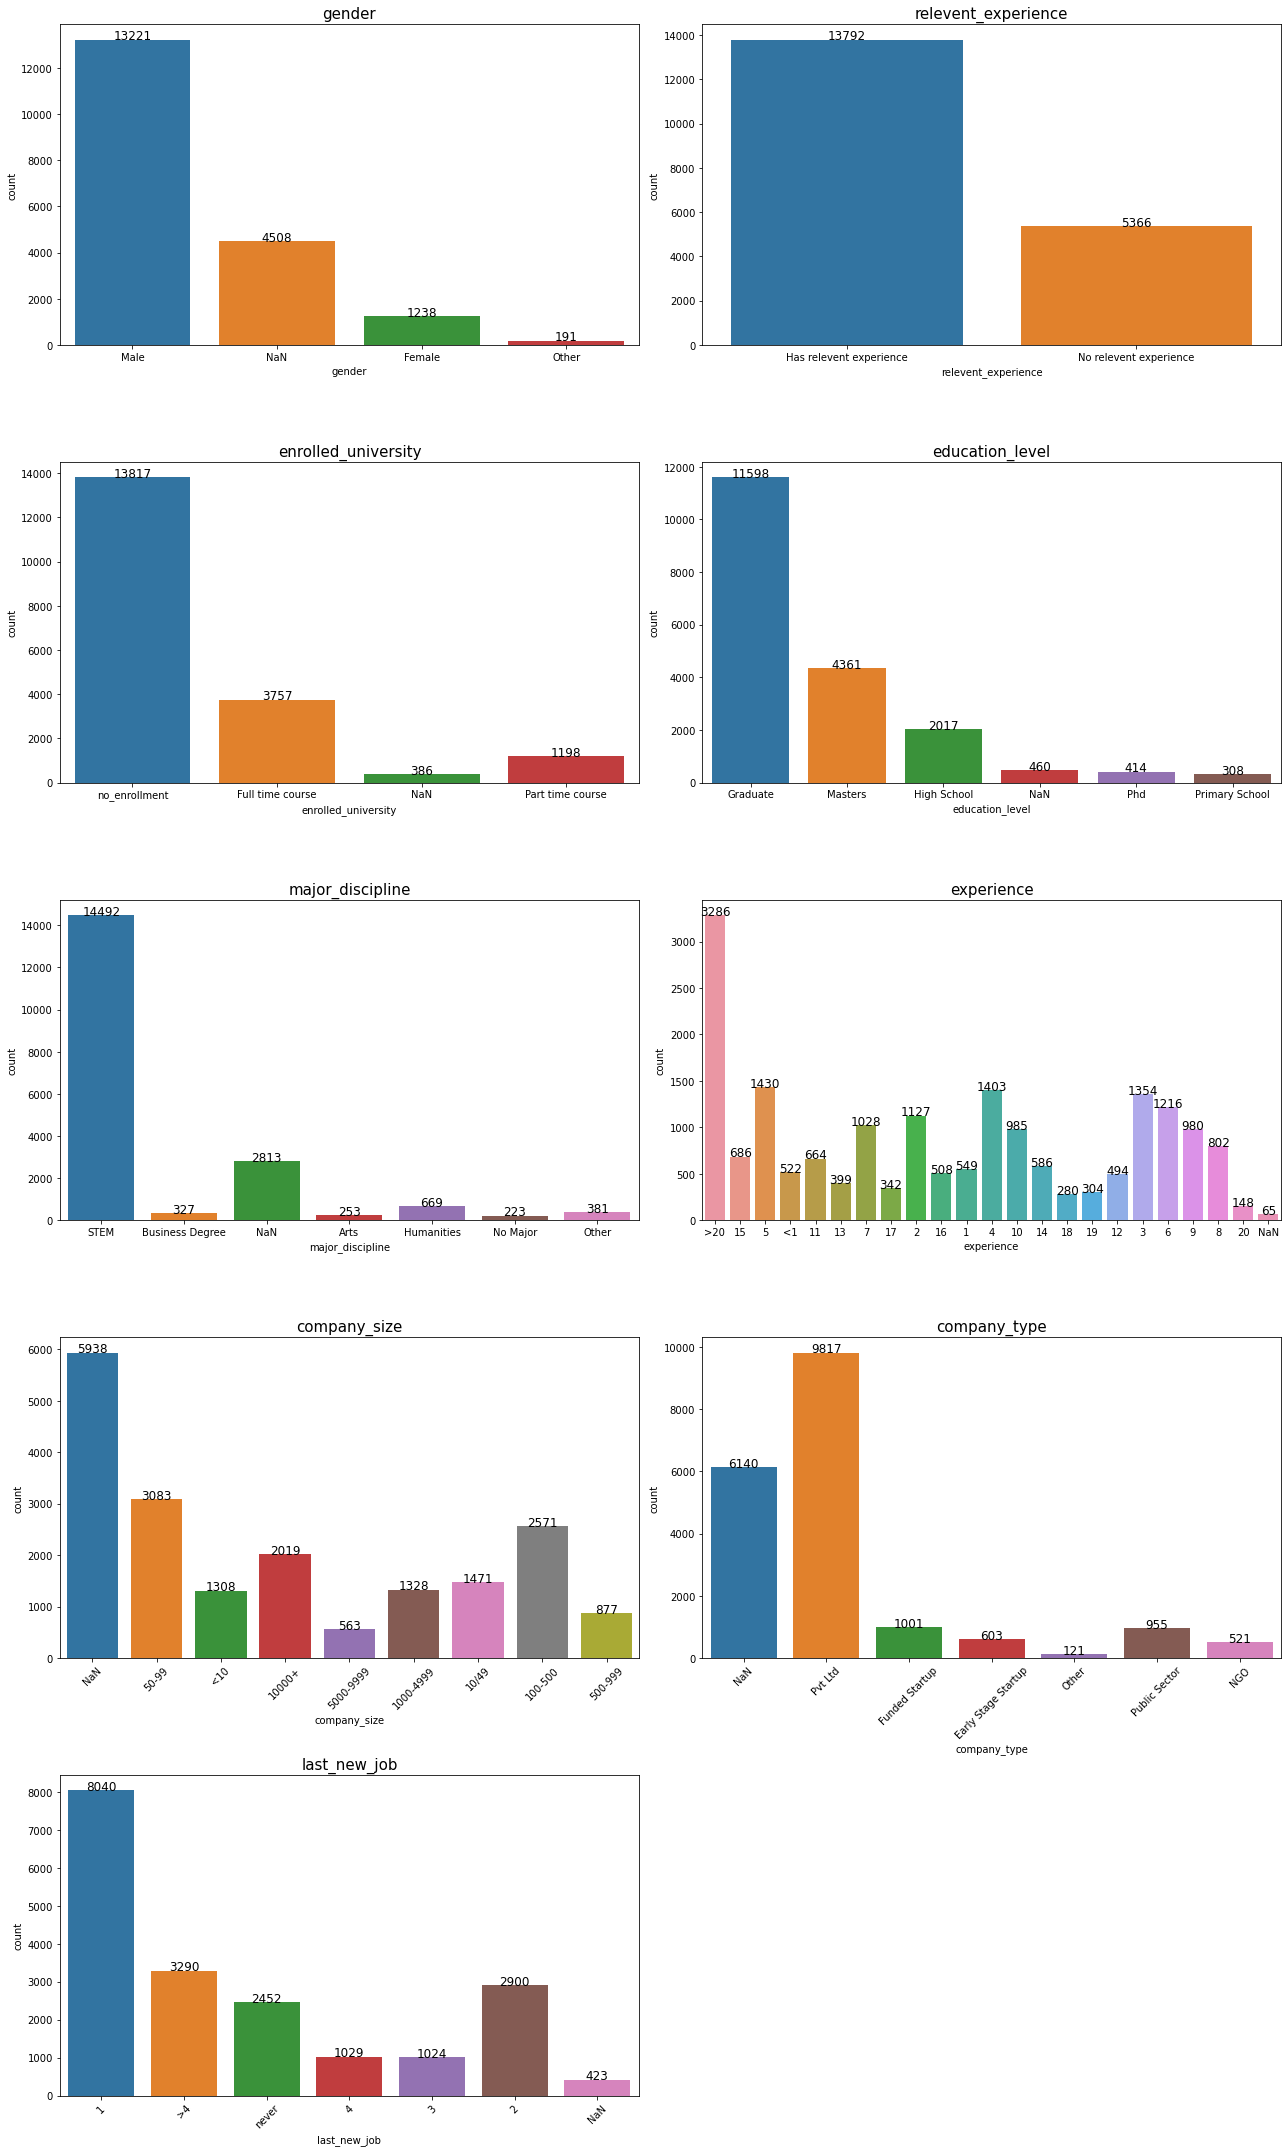

In [14]:
# Plot

# Tamanho da figura.
plt.figure(figsize = (18,30))

# Lista de colunas categóricas.
column_list = list(df.columns.values)[3:12]

# Contador.
contador = 1

for column in column_list:

    plt.subplot(5, 2, contador) # Tamanho individual de cada sub-gráfico.
    ax = sns.countplot(data = df.fillna('NaN'), x = column) #Conta as ocorrências, substituindo NaN pela string "NaN" através de fillna.
    plt.title(column, fontsize = 15) #Titulo do Sub-Gráfico.

    # Valor quantitativo de cada barra.
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    
    # A partir do sétimo gráfico rotacionar a legenda de cada coluna em 45°.
    if contador >= 7:
        plt.xticks(rotation = 45)

    contador += 1 # Incrementa o contador em 1.

# Layout
plt.tight_layout(h_pad = 2)

### Verificando a Distribuição das Variáveis Numéricas

In [15]:
# Descrevendo os dados numéricos mas retirando os campos 'enrollee_id' e 'target', pois apesar de serem dados numéricos são, respectivamente, variáveis de identificador e categoria.
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* Em **city_development_index** (CDI), os valores médios são 0,828, mediana 0,903 e desvio padrão 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas. O Índice que mede desenvolvimento dos municípios são divididos em quatro categorias: baixo desenvolvimento (de 0 a 0,4), desenvolvimento regular (0,4 a 0,5), desenvolvimento moderado (de 0,6 a 0,8) e alto desenvolvimento (0,8 a 1).


* Em **training_hours**, os valores médios são 65,367, mediana 47 e máximo 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos levam muito tempo para fazer o treinamento.

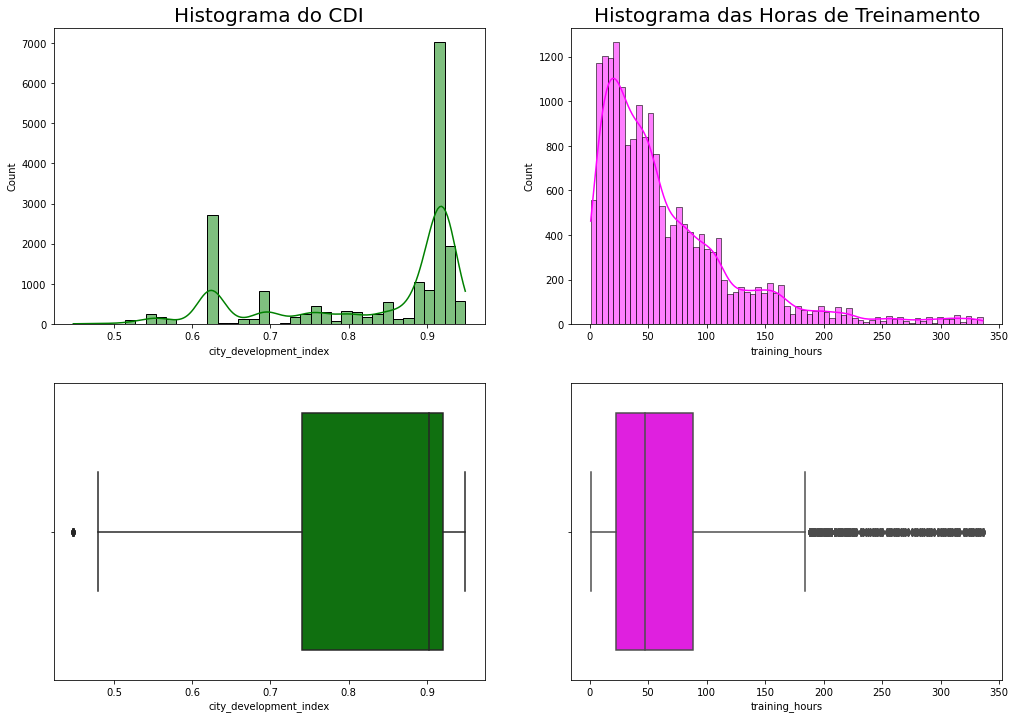

In [16]:
# Plot

# Tamanho da figura.
plt.figure(figsize = (17,12))

# Sub-Gráficos de Histogramas.
plt.subplot(221) #Posição.
sns.histplot(data = df, x = 'city_development_index', kde = True, color = "green") #Histograma com Curva de Densidade (kde).
plt.title('Histograma do CDI', fontsize = 20) #Título

plt.subplot(222) #Posição.
sns.histplot(data = df, x = 'training_hours', kde = True, color = "magenta") #Histograma com Curva de Densidade (kde)
plt.title('Histograma das Horas de Treinamento', fontsize = 20) #Título.

# Sub-Gráficos de Boxplots.
plt.subplot(223) #Posição.
sns.boxplot(data = df, x = 'city_development_index', color = "green", orient="h") #Boxplot com orientação Horizontal.

plt.subplot(224) #Posição.
sns.boxplot(data = df, x = 'training_hours', color = "magenta", orient="h") #Boxplot com orientação Horizontal.

plt.show()

* Pela curva de densidade do histograma de **city_development_index** (CDI) é possível identificar que a variável tem uma **distribuição de frequência bimodal**, ou seja, com duas modas. Ainda é possível identificar a presença de outliers mostrado pelo Boxplot.

* Pela curva de densidade do histograma de **training_hours** é possível identificar que a variável tem uma **distribuição de frequência assimetrica positiva**, ou à direita. Ainda é possível identificar a presença de muitos outliers mostrado pelo Boxplot.


### Teste de Normalidade da Distribuição

Mesmo interpretando os gráficos anteriores é de suma importância testar a normalizade das variáveis.

In [17]:
# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

for feature in numerical_feature:
    # Calcula a normalidade através do 'teste normal'
    statistic, pvalue = normaltest(df[feature])

    # Verificando o valor-p
    if pvalue > 0.05:
        print(feature, ': Distribuição Normal')
    else:
        print(feature, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


* Como as variáveis **city_development_index** e **training_hours** não seguem a distribuição normal, usaremos o método **não paramétrico** para a análise numérica.

* Dados de **training_hours** estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado porque é normal as pessoas se animarem no início do treinamento, mas nem todas o concluem.

## Correlação de Dados e Seleção de Recursos

### Conversão de Variáveis

O interpretador da linguagem Python classifica as variáveis **experience** e **last_new_job** como object, devido a presença de caracteres textuais em seus respectivos dados. Todavia, dependendo da natureza do problema a ser resolvido e do comportamento de cada variável, elas podem ser abordadas como variáveis categóricas ou númericas. Como é necessário selecionar profissionais para uma possível contratação, informações referentes a experiência total de cada candidato (em anos) e a diferença de tempo entre e o último emprego e o atual (em anos) podem ter correlação númerica com a variável **target**.

In [18]:
# Cria uma cópia do Dataframe original.
df_numerical = df.copy() #Dataframe temporário

In [19]:
# Ocorrência de cada valor textual da variável experience.
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [20]:
# Converte a variável experience para numérica.
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"]) #Substituindo <1 por 1.
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"]) #Substituindo >20 por 21.
df_numerical["experience"] = df_numerical["experience"].astype(float) #Conversão de tipos.

In [21]:
# Ocorrência de cada valor numérico da variável experience.
df_numerical["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [22]:
# Ocorrência de cada valor textal da variável last_new_job.
df_numerical["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [23]:
# Converte a variável last new job para numérica.
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"]) #Substituindo 'never' por 0.
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"]) #Substituindo >4 por 5.
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float) #Conversão de tipos.

In [24]:
# Ocorrência de cada valor numérico da variável last_new_job.
df_numerical["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [25]:
# Visualização dos tipos de dados.
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

### Correlação de Spearman's Entre Variáveis Numéricas

O Coeficiente de Correlação de Spearman's avalia a dependência entre variáveis. Em outras palavras, ele verifica se mudanças em uma variável ocasionam mudanças em outra. Nesse caso analisamos a correlação entre as variáveis numéricas e a variável **target**.

In [26]:
# Cálculo do coeficiente de Spearman, removendo os identificadores de cada linha.
searmans_correlation_coefficient = df_numerical.drop("enrollee_id", axis = 1).corr("spearman")
searmans_correlation_coefficient

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


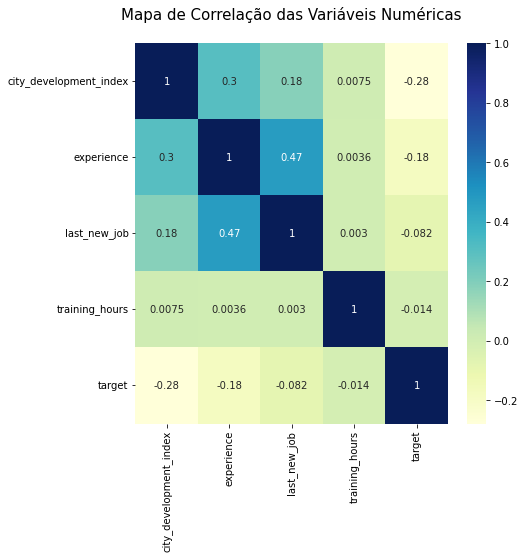

In [27]:
# Heatmap.
plt.figure(figsize = (7,7)) #Tamanho do gráfico.
sns.heatmap(searmans_correlation_coefficient, annot = True, cmap = "YlGnBu") #Mapa de Calor.
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15) #Título.
plt.show()

Algumas interpretações sobre os resultados obtidos:

- Embora seja uma correlação fraca, as variáveis **experience** e **city_development_index** tem correlação positivas (0.30) entre si. Possivelmente, profissionais residentes em cidades com alto índice de desenvolvimento tem maiores experiências.

- As variáveis **experience** e **last_new_job** tem correlação média positivas (0.473) entre si. Possivelmente, profissinais que ficam pouco tempo sem trabalhar são mais experientes.

- As variáveis **experience** e **trainng_hours** não tem correlação entre si, pois o valor é muito próximo a zero (0.0036).

- Embora seja uma correlação fraca, as variáveis **experience** e **target** tem correlação negativas (-0.183) entre si. Possivelmente, profissionais com maiores experiências não estão buscando por um novo emprego na empresa de consultoria.

- As variáveis **last_new_job** e **training_hours** tem correlaões próximas de zero com a variável alvo e, portanto, podem ser descartadas.

### Weight of Evidence (WOE) e Information Value (IV)


Weight of Evidence (WOE) e Information Value (IV) são métricas usadas para avaliar a importância de uma variável para prever uma variável alvo. Eles são comumente usados com variáveis categóricas, mas também podem ser aplicados a variáveis numéricas. O WOE fornece o poder preditivo de cada classe de uma variável, enquanto o IV fornece um valor único que representa o poder preditivo total da variável. Estas métricas ajudam na seleção de recursos importantes para prever a variável alvo.

A fórmula para calcular o peso da evidência para qualquer característica é dada por:
- WOE = ln (percentual de eventos / percentual de não eventos)

A fórmula para calcular o valor da informação é dada por:
- IV = &sum; (WOE * (percentual de eventos - percentual de não eventos)

<table border = "1">
    <tr>
        <td>< 0.02</td>
        <td>Não deve ser usado para previsão</td>
    </tr>
    <tr>
        <td>0.02 - 0.1</td>
        <td>Preditor fraco</td>
    </tr>
    <tr>
        <td>0.1 - 0.3</td>
        <td>Preditor médio</td>
    </tr>
    <tr>
        <td>0.3 - 0.5</td>
        <td>Preditor forte</td>
    </tr>
    <tr>
        <td>> 0.5</td>
        <td>Bom demais para ser verdade</td>
    </tr>
</table>

Nesta etapa da análise, as seguintes variáveis serão excluídas: **enrollee_id**, pois é uma variável de identificação única; **city_development_index**, **training_hours**, **experience** e **last_new_job**, pois são variáveis numéricas; **city**, pois não há informações relevantes sobre cidades específicas; e **company_size**, pois o tamanho da empresa que o candidato trabalha atualmente não é relevante para a análise. Além disso, a variável **target** também será excluída por ser a variável alvo.

In [28]:
#Indica quais colunas serão removidads.
drop_columns = ['enrollee_id', #Variavável de identificação.
                'city_development_index', #Variável numérica.
                'training_hours', #Variável numérica.
                'experience', #Variável numérica.
                'last_new_job', #Variável numérica.
                'city', #Variável irrelevante.
                'company_size', #Variável irrelevante.
                'target' #Variável alvo.
              ]

# Remove algumas colunas do Dataframe deixando apenas variáveis categóricas para essa análise.
categorical_columns = df.drop(columns = drop_columns).columns

# Lista para armazenar o IV.
iv = []

#Loop.
for column in categorical_columns:
    #Calcula a tabela cruzada de Target com todas as classes de todas as variaváveis que não foram retiradas.
    df_woe_iv = (pd.crosstab(df[column], df['target'], normalize = 'columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0])) #WOE.
                .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0])))) #IV.
    #Armazenando os valores de IV.
    iv.append(df_woe_iv['iv'][0])

    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

<Figure size 720x864 with 0 Axes>

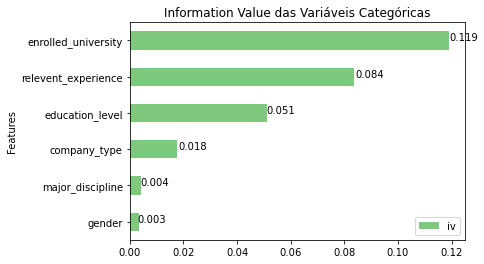

In [29]:
# Dataframe do Information Value
df_iv = pd.DataFrame({'Features':categorical_columns,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot do Information Value
plt.figure(figsize = (10,12)) #Tamanho do gráfico.
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")

for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))

plt.legend(loc = "lower right")
plt.show()

- No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.

- De acordo com o valor de Information Value (IV), **enrolled_university** é considerado um preditor de médio, enquanto que **relevant_experience** e **education_level** são considerados preditores fracos. As outras variáveis poderiam ser desconsideradas para a previsão, pois apresentam correlação próxima a zero com a variável **target**, ou ainda, não são necessárias para determinar se um(a) candidato(a) deve ser contratado(a). Entretanto, neste momento da análise apenas a variável **gender** será descartada. É possível que outras variáveis nessas mesmas condições também sejam descartadas de acordo com o resultado de análises futuras.

## Identificando Valores Ausentes, Duplicados e Desbalanceados

### Identificando Valores Ausentes

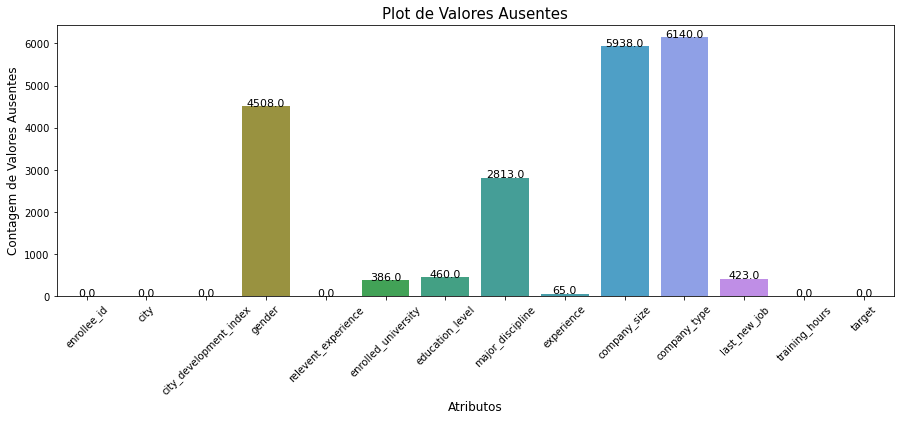

In [30]:
# Valores ausentes (NaN) por coluna.
null_df = df.isna().sum().reset_index()

# Tamanho do gráfico.
ax = plt.figure(figsize = (15,5))

# Barplot.
ax = sns.barplot(x = null_df['index'], y = null_df[0], palette = 'husl')

#Formatação do Gráfico.
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

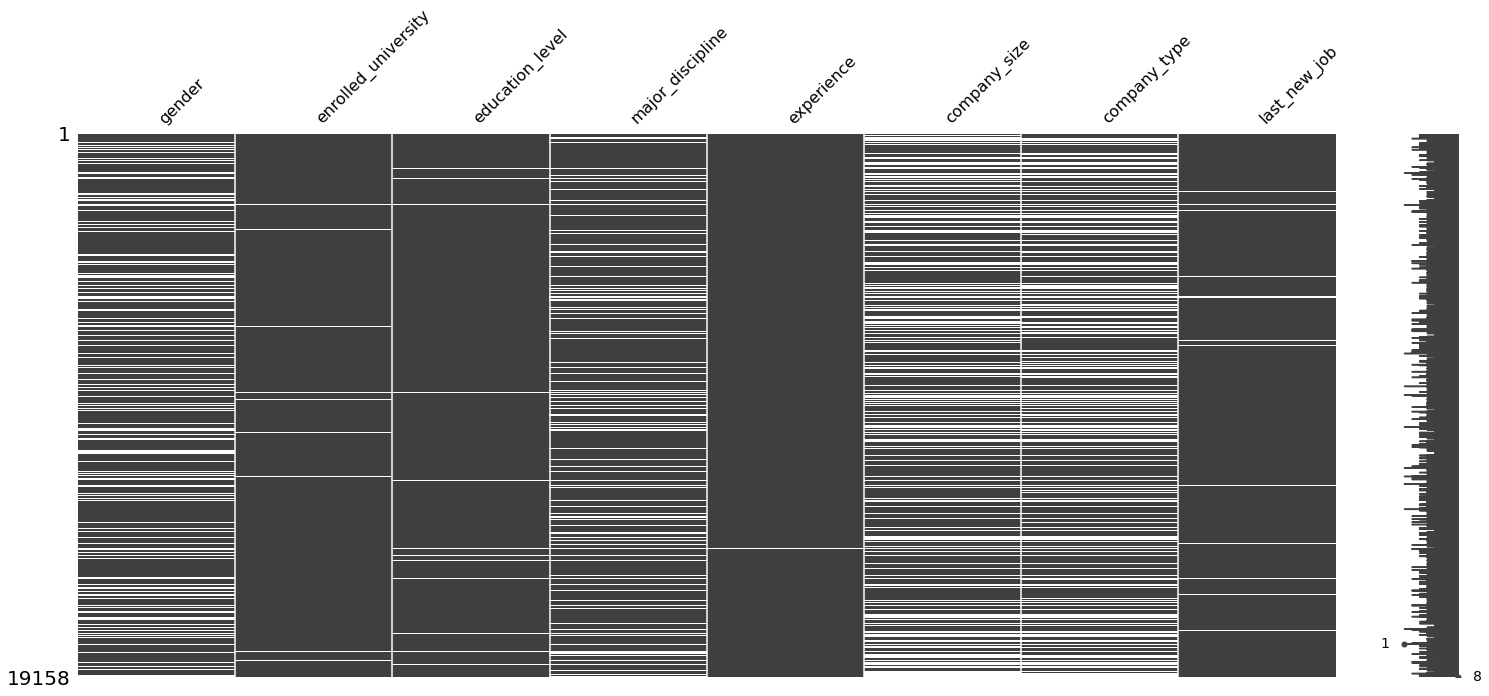

In [31]:
# Mapa de Valores Ausentes.

# Dataframe.
df_nan = pd.DataFrame(df.isna().sum())

# Plot.
if df.isna().any(axis = None): #A função any() retorna True se qualquer item em um objeto iterável for verdadeiro, caso contrário, retorna False. Se o objeto iterável estiver vazio, a função any() retornará False.
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Os valores ausentes de cada coluna não seguem um padrão.

### Identificando Valores Duplicados

In [32]:
# Verifica valores duplicados pela coluna de id.
df['enrollee_id'].duplicated().sum()

0

Não há linhas com identificadores duplicados

### Identificando Dados Desbalanceados

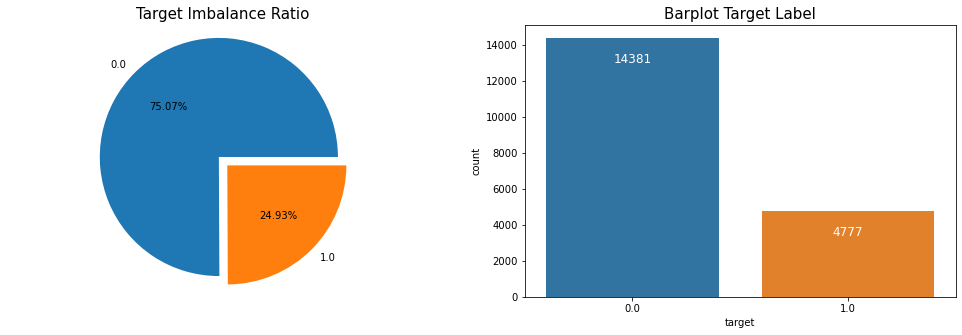

In [33]:
# Tamanho da figura.
plt.figure(figsize = (17,(100)/20))

#Pieplot.
plt.subplot(121) #Posição do Sub-Gráfico.
plt.pie(round(df['target'].value_counts() / len(df) * 100, 2), labels = list(df['target'].value_counts().index), autopct = "%.2f%%", explode = (0,0.1))
plt.axis("equal") #Espaço entre os Sub-Gráficos.
plt.title("Target Imbalance Ratio", size = 15) #Título.

#Barplot.
plt.subplot(122) #Posição do Sub-Gráfico.
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15) #Título.

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', va = 'top', color = 'white', size = 12)

Os dados da variável **target** estão desbalanceados. Para o tipo de análise realizada nesse momento uma correção não é necessária. Em outras analises, como a preditiva, seria imprescindível corrigí-los.

## Limpeza e Processamento dos Dados

### Tratando os Valores Ausentes

Através das análises realizadas anteriormente, algumas variáveis foram identificadas como não sendo relevantes para o problema de negócio em questão, e, portanto, não serão incluídas nas futuras análises ou modelos. Recapitulando:

- Os atributos **city** e **company_size** foram considerados irrelevantes pelo contexto do problema de negócio.
- O atributo categórico **gender** não será utilizado pois tem Information Value (IV) próximo a zero com a variável **target**.
- Os atributos númericos **last_new_job** e **training_hours** não serão utilizados pois têm correlações de Spearman próximas de zero com a variável **target**. 

In [34]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [35]:
#Seleção de colunas relevantes para a análise.
columns_use = ['city_development_index', 
               'experience', 
               'enrolled_university', 
               'relevent_experience', 
               'education_level',
               'company_type',
               'major_discipline',
               'target']

In [36]:
#Novo conjunto de dados sem as variáveis indesejadas.
new_df = df[columns_use]

In [37]:
# Amostra dos dados. Primeiras cinco linhas do novo conjunto de dados.
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


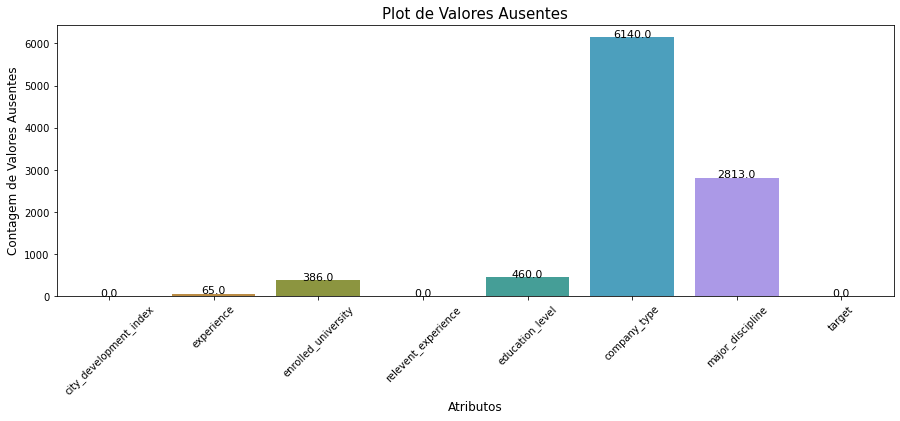

In [38]:
# Valores ausentes (NaN) por coluna do novo conjunto de dados.
null_df = new_df.isna().sum().reset_index()

# Tamanho do gráfico.
ax = plt.figure(figsize = (15,5))

# Barplot.
ax = sns.barplot(x = null_df['index'], y = null_df[0], palette = 'husl')

#Formatação do Gráfico.
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

In [39]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index     0.000000
experience                 0.339284
enrolled_university        2.014824
relevent_experience        0.000000
education_level            2.401086
company_type              32.049274
major_discipline          14.683161
target                     0.000000
dtype: float64

#### Variável **major_discipline**

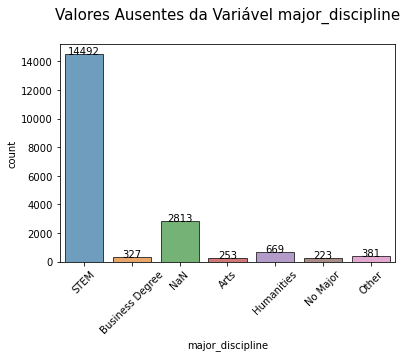

In [40]:
# Valores ausentes da Variável major_discipline.
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
#Formatação
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.title("Valores Ausentes da Variável major_discipline\n", fontsize = 15)
plt.show()

##### Estratégia 01

Relação de valores ausentes entre major_discipline x education_level

In [41]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('Proporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 2813
Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Analisando os valores ausentes da variável **major_discipline**, é possível observar a proporção de acordo com a variável **education_level**. A fim de preencher os valores faltantes da variável **major_discipline**, optou-se por utilizar **Non Degree** quando houverem registros de High School ou Primary School na variável **education_level**. Isso significa que o candidato não tem formação em nível de especialização.

In [42]:
#Selecionando os índices que serão modificados.
nan_index = new_df[new_df['major_discipline'].isna() & new_df['education_level'].isin(['High School', 'Primary School', np.nan])].index

In [43]:
#Tamanho do index.
len(nan_index)

2785

In [73]:
# Imputação do valor ausente.
new_df.loc[nan_index, 'major_discipline'] = 'Non Degree'

##### Estratégia 02

In [45]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

Para os valores ausentes restantes preenchemos com 'Other'

In [70]:
new_df.loc[new_df['major_discipline'].isna(), 'major_discipline']  = 'Other'

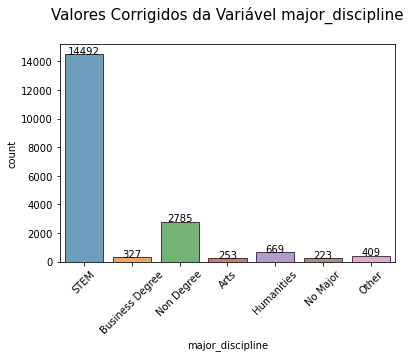

In [47]:
# Valores Corrigidos da Variável major_discipline
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
#Formatação
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.title("Valores Corrigidos da Variável major_discipline\n", fontsize = 15)
plt.show()

#### Variável **enrolled_university**

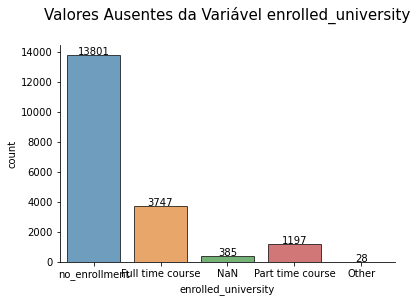

In [48]:
# Valores ausentes específicos da Variável enrolled_university.
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
# Formatação.
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.title("Valores Ausentes da Variável enrolled_university\n", fontsize = 15)
plt.show()

##### Estratégia 01

Relação de valores ausentes entre major_discipline x education_level

In [49]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['enrolled_university'].isna().sum())
print('Proporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 385
Proporção de Valores Ausentes na Variável education_level:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

 Analisando os valores ausentes da variável **enrolled_university**, é possível observar a proporção de acordo com a variável **education_level**. A fim de preencher os valores faltantes da variável **enrolled_university**, optou-se por utilizar **Primary Grad** quando houverem registros de Primary School na variável **education_level**. Isso significa que o candidato não está apto a ingressar na universidade.

In [50]:
# Selecionando os índices que serão modificados
nan_index = new_df[new_df['enrolled_university'].isna() & new_df['education_level'].isin(['Primary School'])].index

In [51]:
len(nan_index)

9

In [71]:
# Imputação de valores ausentes
new_df.loc[nan_index, 'enrolled_university'] = 'Primary Grad'

##### Estratégia 02

In [53]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['enrolled_university'].isna().sum())
new_df['enrolled_university'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 376


no_enrollment       13801
Full time course     3747
Part time course     1197
NaN                   376
Other                  28
Primary Grad            9
Name: enrolled_university, dtype: int64

Para os valores ausentes restantes preenchemos com 'Other'

In [54]:
new_df.loc[new_df['enrolled_university'].isna(), 'enrolled_university']  = 'Other'

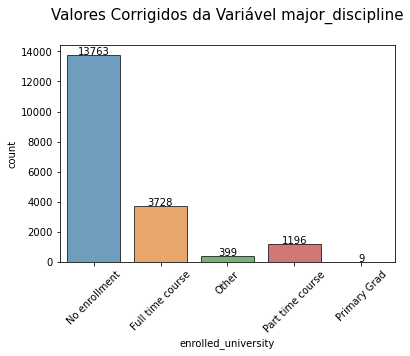

In [72]:
# Valores Corrigidos da Variável major_discipline
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
#Formatação
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.title("Valores Corrigidos da Variável major_discipline\n", fontsize = 15)
plt.show()

#### Variável **company_type**

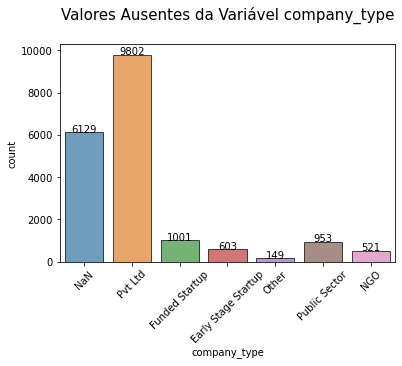

In [56]:
# Valores ausentes específicos da Variável major_discipline
sns.countplot(data = new_df.fillna('NaN'), x = 'company_type', alpha = 0.7, edgecolor = 'black')
#Formatação
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.title("Valores Ausentes da Variável company_type\n", fontsize = 15)
plt.show()

##### Estratégia

Para os valores ausentes preenchemos com 'Other'

In [74]:
new_df.loc[new_df['company_type'].isna(), 'company_type']  = 'Other'

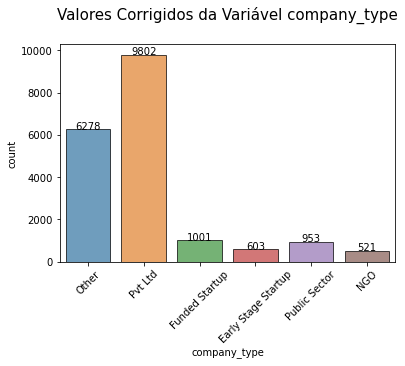

In [58]:
# Valores Corrigidos da Variável major_discipline
sns.countplot(data = new_df.fillna('NaN'), x = 'company_type', alpha = 0.7, edgecolor = 'black')
#Formatação
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.title("Valores Corrigidos da Variável company_type\n", fontsize = 15)
plt.show()

#### Variável **education_level**

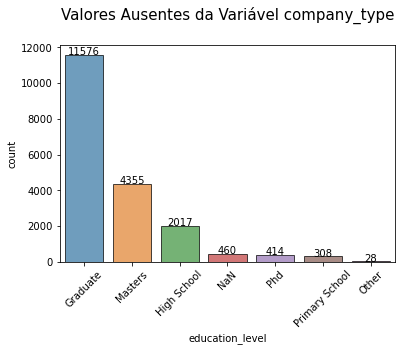

In [59]:
# Valores ausentes específicos da Variável major_discipline
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
#Formatação
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.title("Valores Ausentes da Variável company_type\n", fontsize = 15)
plt.show()

##### Estratégia

Para os valores ausentes preenchemos com 'Other'

In [75]:
new_df.loc[new_df['education_level'].isna(), 'education_level']  = 'Other'

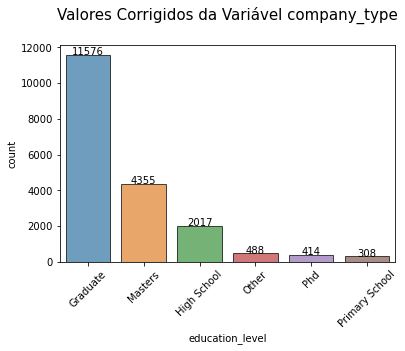

In [61]:
# Valores Corrigidos da Variável major_discipline
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
#Formatação
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.title("Valores Corrigidos da Variável company_type\n", fontsize = 15)
plt.show()

#### Variável **experience**

##### Estratégia

A quantidade de valores ausentes da variável experience corresponde a aproximadamente 0.33% do Dataframe. Logo, é mais viável remover os valores ausentes nesse ponto da análise.

In [62]:
# Quantidade de linhas e colunas do conjunto de dados.
rows, columns = new_df.shape
print(f"Linhas: {rows}\nColunas: {columns}")

Linhas: 19158
Colunas: 8


In [63]:
new_df = new_df.dropna() #Deve-se usar com cautela.

In [64]:
rows, columns = new_df.shape
print(f"Linhas: {rows}\nColunas: {columns}")

Linhas: 19095
Colunas: 8


In [65]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

### Ajustes Finais

Padronizando o campo **enrolled_university** para que a primeira letra de 'no_enrollment' seja maiúscula.

In [66]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [67]:
# Padronizando os dados
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [68]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


Dividindo em x, que é usado para armazenar as features, e y, que é usado para armazenar o target. Essas variáveis são frequentemente usadas em modelos de aprendizado de máquina para treinar o modelo e fazer previsões. 

In [69]:
x = new_df.drop(columns = ['target'])
y = new_df['target']

## Relatório Final

Com base em nossa análise observamos que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- Se está ou não matriculado em um curso universitário.
- Se tem ou não experiência relevante.
- O nível educacional.
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treinamento.


**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.